# Importing

In [2]:
from random import Random
from time import time
import inspyred
import math
from datetime import datetime
import pandas as pd
import numpy as np
#style graphs
import os
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
import matplotlib.pyplot as plt

# following line is to enable the jupyter black theme:
#from jupyterthemes import jtplot
#jtplot.style( context='notebook',grid=False, ticks =True, fscale =1)
#nice graphsin jupyter:
#%matplotlib notebook  

# importing perfect information methods and variables
import src.perfectga as pe

import src.imperfectga as im


# Symmetric information

In [3]:
# Symmetric Information (Figure 9)

name_1 = 'static_perf_10000_h0.1_cro_1.0_mut_0.2_key_2c843c1'
name_3 = 'static_perf_10000_h0.3_cro_1.0_mut_0.2_key_002d2cb'
name_5 = 'static_perf_10000_fix_cro_1_mut_0.2_key_d6268f5'
name_7 = 'static_perf_10000_h0.7_cro_1.0_mut_0.2_key_7068459'
name_9 = 'static_perf_20000_h0.9_cro_1.0_mut_0.2_key_354e2ab'
name_9 = 'static_perf_40000_h0.9_cro_1.0_mut_0.2_key_c83f510'

db_sims_1 = pd.read_csv('./data/{}.csv'.format(name_1)).set_index('sim')
db_sims_3 = pd.read_csv('./data/{}.csv'.format(name_3)).set_index('sim')
db_sims_5 = pd.read_csv('./data/{}.csv'.format(name_5)).set_index('sim')
db_sims_7 = pd.read_csv('./data/{}.csv'.format(name_7)).set_index('sim')
db_sims_9 = pd.read_csv('./data/{}.csv'.format(name_9)).set_index('sim')

db_sims_1 = db_sims_1[db_sims_1['cutoff']==10000]
db_sims_3 = db_sims_3[db_sims_3['cutoff']==10000]
db_sims_5 = db_sims_5[db_sims_5['cutoff']==10000]
db_sims_7 = db_sims_7[db_sims_7['cutoff']==10000]
db_sims_9 = db_sims_9[db_sims_9['cutoff']==40000]

len(db_sims_9)

7004

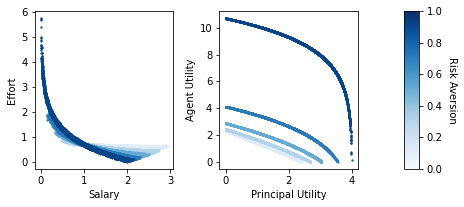

<Figure size 432x288 with 0 Axes>

In [4]:
fig= plt.figure(figsize=(8, 3), constrained_layout=False)#
gs = fig.add_gridspec(1, 8, hspace = 6, wspace=3)
# Getting specific colors in colorbar
cmap_blue = mpl.cm.Blues #using Blues

#colors
blue1 = '#dfebf7'
blue3 = '#b1d2e8'
blue5 = '#65aad4'
blue7 = '#2a7ab9'
blue9 = '#084488'

ax1 = fig.add_subplot(gs[:, 0:3])
#ax1 = fig.add_subplot()
ax1.scatter(db_sims_1['vw'], db_sims_1['va'], lw=1.4, s=0.8, c= blue1)
ax1.scatter(db_sims_3['vw'], db_sims_3['va'], lw=1.4, s=0.8, c=blue3)
ax1.scatter(db_sims_5['vw'], db_sims_5['va'], lw=1.4, s=0.8, c=blue5)
ax1.scatter(db_sims_7['vw'], db_sims_7['va'], lw=1.4, s=0.8, c= blue7)
ax1.scatter(db_sims_9['vw'], db_sims_9['va'], lw=1.4, s=0.8, c=blue9)
plt.ylabel("Effort",fontsize=10)
plt.xlabel("Salary",fontsize=10)

ax2 = fig.add_subplot(gs[:, 3:6])
ax2.scatter(db_sims_1['vU'],db_sims_1['vV'], lw=1.4, s=0.8, c=blue1)
ax2.scatter(db_sims_3['vU'], db_sims_3['vV'], lw=1.4, s=0.8, c= blue3)
ax2.scatter(db_sims_5['vU'], db_sims_5['vV'], lw=1.4, s=0.8, c=blue5)
ax2.scatter(db_sims_7['vU'], db_sims_7['vV'], lw=1.4, s=0.8, c=blue7)
ax2.scatter(db_sims_9['vU'],db_sims_9['vV'], lw=1.4, s=0.8, c=blue9)
plt.xlabel("Principal Utility",fontsize=10)
plt.ylabel("Agent Utility",fontsize=10)

ax3 = fig.add_subplot(gs[:,6:7])
#seting color bar
#reds = cm.get_cmap('Reds', 256)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cbar = mpl.colorbar.ColorbarBase(ax3, 
                                 cmap=cmap_blue,
                                 norm = norm)
#cbar.set_ticks([0,255])
cbar.set_label('Risk Aversion', 
               rotation = 270, 
               labelpad=15.0)

#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.9, top=0.9,wspace = 0.32)
plt.show()

plt.savefig('./reports/Per_Inf_GA_risk_aversion_1x2.pdf',dpi =100)


# Loading existing database


In [5]:
# Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook

name = "simulations_50K"
#name = 'static_perf_10000_fix_cro_1_mut_0.2_key_d6268f5'
#name = 'static_imp_10000_fix_cro_1.0_mut_0.2_key_6c27125'

try:
    db_sims = pd.read_csv('./data/{}.csv'.format(name))
except:
    print("Impossible to retrieve {}.cvc".format(name))
    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
#db_sims.rename(columns= {'Unnamed: 0':'sim','cara':'risk_aversion_coefficient'},inplace=True)
#db_sims.set_index('sim',inplace= True)
#printing head of dataframe,checkingif everything is ok

db_sims.columns = im.cols

db_sims.head()

,sim,princ,agent,wl,wh,risk_averse,init_pop,gen,cutoff
0,b614071e-9d54-4027-a275-ecfe8f8b9799,1.983400,0.377506,0.085311,1.939916,0.1,0.96,20,50000
1,b614071e-9d54-4027-a275-ecfe8f8b9799,1.958057,0.406117,0.134011,1.930540,0.1,0.96,20,50000
2,b614071e-9d54-4027-a275-ecfe8f8b9799,1.911869,0.448248,0.094959,2.081410,0.1,0.96,20,50000
3,b614071e-9d54-4027-a275-ecfe8f8b9799,1.105138,1.258426,0.950601,2.821997,0.1,0.96,20,50000
4,b614071e-9d54-4027-a275-ecfe8f8b9799,1.495374,0.879400,0.564469,2.430465,0.1,0.96,20,50000


In [6]:
#Constructing effort column
def effort(row):
    c = 1-row['risk_averse']
    row['effort'] = np.log( (row['wl']**c +row['wh']**c)/(c))
    return row

db_sims=db_sims.apply(effort, axis=1)

db_sims.head()

,sim,princ,agent,wl,wh,risk_averse,init_pop,gen,cutoff,effort
0,b614071e-9d54-4027-a275-ecfe8f8b9799,1.983400,0.377506,0.085311,1.939916,0.1,0.96,20,50000,0.760107
1,b614071e-9d54-4027-a275-ecfe8f8b9799,1.958057,0.406117,0.134011,1.930540,0.1,0.96,20,50000,0.784144
2,b614071e-9d54-4027-a275-ecfe8f8b9799,1.911869,0.448248,0.094959,2.081410,0.1,0.96,20,50000,0.825372
3,b614071e-9d54-4027-a275-ecfe8f8b9799,1.105138,1.258426,0.950601,2.821997,0.1,0.96,20,50000,1.357933
4,b614071e-9d54-4027-a275-ecfe8f8b9799,1.495374,0.879400,0.564469,2.430465,0.1,0.96,20,50000,1.142670


In [7]:
#Constructing gap salary column
def gap(row):
    row['gap'] = row['wh']-row['wl']
    return row

db_sims_eff_gap = db_sims.apply(gap, axis=1)

db_sims = db_sims_eff_gap

db_sims_eff_gap.head()

,sim,princ,agent,wl,wh,risk_averse,init_pop,gen,cutoff,effort,gap
0,b614071e-9d54-4027-a275-ecfe8f8b9799,1.983400,0.377506,0.085311,1.939916,0.1,0.96,20,50000,0.760107,1.854605
1,b614071e-9d54-4027-a275-ecfe8f8b9799,1.958057,0.406117,0.134011,1.930540,0.1,0.96,20,50000,0.784144,1.796529
2,b614071e-9d54-4027-a275-ecfe8f8b9799,1.911869,0.448248,0.094959,2.081410,0.1,0.96,20,50000,0.825372,1.986451
3,b614071e-9d54-4027-a275-ecfe8f8b9799,1.105138,1.258426,0.950601,2.821997,0.1,0.96,20,50000,1.357933,1.871396
4,b614071e-9d54-4027-a275-ecfe8f8b9799,1.495374,0.879400,0.564469,2.430465,0.1,0.96,20,50000,1.142670,1.865996


In [8]:
U_ga90 = db_sims[(db_sims['risk_averse']==0.9)]['princ']
V_ga90 = db_sims[(db_sims['risk_averse']==0.9)]['agent']
WL_ga90 = db_sims[(db_sims['risk_averse']==0.9)]['wl']
WH_ga90 = db_sims[(db_sims['risk_averse']==0.9)]['wh']
effort_90 = db_sims[(db_sims['risk_averse']==0.9)]['effort']
gap_90 = db_sims[(db_sims['risk_averse']==0.9)]['gap']

U_ga70 = db_sims[(db_sims['risk_averse']==0.7)]['princ']
V_ga70 = db_sims[(db_sims['risk_averse']==0.7)]['agent']
WL_ga70 = db_sims[(db_sims['risk_averse']==0.7)]['wl']
WH_ga70 = db_sims[(db_sims['risk_averse']==0.7)]['wh']
effort_70 = db_sims[(db_sims['risk_averse']==0.7)]['effort']
gap_70 = db_sims[(db_sims['risk_averse']==0.7)]['gap']

U_ga50 = db_sims[(db_sims['risk_averse']==0.5)]['princ']
V_ga50 = db_sims[(db_sims['risk_averse']==0.5)]['agent']
WL_ga50 = db_sims[(db_sims['risk_averse']==0.5)]['wl']
WH_ga50 = db_sims[(db_sims['risk_averse']==0.5)]['wh']
effort_50 = db_sims[(db_sims['risk_averse']==0.5)]['effort']
gap_50 = db_sims[(db_sims['risk_averse']==0.5)]['gap']

U_ga30 = db_sims[(db_sims['risk_averse']==0.3)]['princ']
V_ga30 = db_sims[(db_sims['risk_averse']==0.3)]['agent']
WL_ga30 = db_sims[(db_sims['risk_averse']==0.3)]['wl']
WH_ga30 = db_sims[(db_sims['risk_averse']==0.3)]['wh']
effort_30 = db_sims[(db_sims['risk_averse']==0.3)]['effort']
gap_30 = db_sims[(db_sims['risk_averse']==0.3)]['gap']

U_ga10 = db_sims[(db_sims['risk_averse']==0.1)]['princ']
V_ga10 = db_sims[(db_sims['risk_averse']==0.1)]['agent']
WL_ga10 = db_sims[(db_sims['risk_averse']==0.1)]['wl']
WH_ga10 = db_sims[(db_sims['risk_averse']==0.1)]['wh']
effort_10 = db_sims[(db_sims['risk_averse']==0.1)]['effort']
gap_10 = db_sims[(db_sims['risk_averse']==0.1)]['gap']

# Ploting


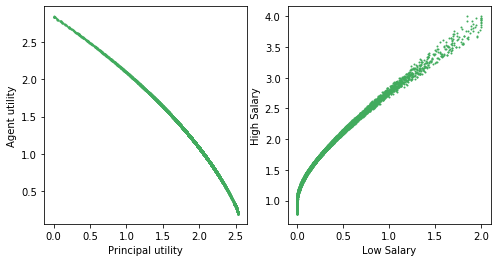

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(U_ga50, V_ga50, color ='#41ab5d', s=1.0, alpha=1)
plt.ylabel("Agent utility", fontsize=10)
plt.xlabel("Principal utility", fontsize=10)
plt.subplot(122)
plt.scatter(WL_ga50, WH_ga50, color ='#41ab5d', s=1.0, alpha=1)
plt.xlabel("Low Salary",fontsize=10)
plt.ylabel("High Salary",fontsize=10)
plt.show()



plt.savefig('./reports/GA_Imperf_Inf.pdf',dpi =60)

plt.show()

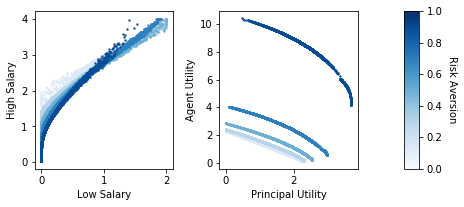

<Figure size 432x288 with 0 Axes>

In [10]:
fig= plt.figure(figsize=(8, 3), constrained_layout=False)#
gs = fig.add_gridspec(1, 8, hspace = 6, wspace=3)
# Getting specific colors in colorbar
cmap_blue = mpl.cm.Blues #using Blues

ax1 = fig.add_subplot(gs[:, 0:3])
#ax1 = fig.add_subplot()
ax1.scatter(WL_ga10, WH_ga10, lw=1.4, s=0.9, c='#DCEAF7')
ax1.scatter(WL_ga30, WH_ga30, lw=1.4, s=0.9, c='#B8D4EA')
ax1.scatter(WL_ga50, WH_ga50, lw=1.4, s=0.9, c='#6BAFD4')
ax1.scatter(WL_ga70, WH_ga70, lw=1.4, s=0.9, c='#2E7FBE')
ax1.scatter(WL_ga90, WH_ga90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Low Salary",fontsize=10)
plt.ylabel("High Salary",fontsize=10)

ax2 = fig.add_subplot(gs[:, 3:6])
ax2.scatter(U_ga10, V_ga10, lw=1.4, s=0.9, c='#DCEAF7')
ax2.scatter(U_ga30, V_ga30, lw=1.4, s=0.9, c='#B8D4EA')
ax2.scatter(U_ga50, V_ga50, lw=1.4, s=0.9, c='#6BAFD4')
ax2.scatter(U_ga70, V_ga70, lw=1.4, s=0.9, c='#2E7FBE')
ax2.scatter(U_ga90, V_ga90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Principal Utility",fontsize=10)
plt.ylabel("Agent Utility",fontsize=10)

ax3 = fig.add_subplot(gs[:,6:7])
#seting color bar
#reds = cm.get_cmap('Reds', 256)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cbar = mpl.colorbar.ColorbarBase(ax3, 
                                 cmap=cmap_blue,
                                 norm = norm)
#cbar.set_ticks([0,255])
cbar.set_label('Risk Aversion', 
               rotation = 270, 
               labelpad=15.0)

#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.9, top=0.9,wspace = 0.32)
plt.show()

plt.savefig('./reports/Imp_Inf_GA_risk_aversion_1x2.pdf')


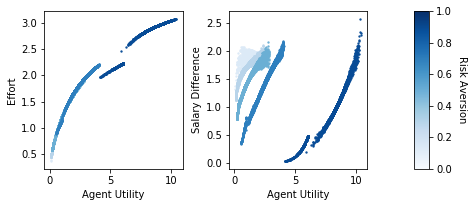

<Figure size 432x288 with 0 Axes>

In [11]:
fig= plt.figure(figsize=(8, 3), constrained_layout=False)#
gs = fig.add_gridspec(1, 8, hspace = 6, wspace=3)
# Getting specific colors in colorbar
cmap_blue = mpl.cm.Blues #using Blues

ax1 = fig.add_subplot(gs[:, 0:3])
#ax1 = fig.add_subplot()
ax1.scatter(V_ga10, effort_10, lw=1.4, s=0.9, c='#DCEAF7')
ax1.scatter(V_ga30, effort_30, lw=1.4, s=0.9, c='#B8D4EA')
ax1.scatter(V_ga50, effort_50, lw=1.4, s=0.9, c='#6BAFD4')
ax1.scatter(V_ga70, effort_70, lw=1.4, s=0.9, c='#2E7FBE')
ax1.scatter(V_ga90, effort_90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Agent Utility",fontsize=10)
plt.ylabel("Effort",fontsize=10)

ax2 = fig.add_subplot(gs[:, 3:6])
#ax1 = fig.add_subplot()
ax2.scatter(V_ga10, gap_10, lw=1.4, s=0.9, c='#DCEAF7')
ax2.scatter(V_ga30, gap_30, lw=1.4, s=0.9, c='#B8D4EA')
ax2.scatter(V_ga50, gap_50, lw=1.4, s=0.9, c='#6BAFD4')
ax2.scatter(V_ga70, gap_70, lw=1.4, s=0.9, c='#2E7FBE')
ax2.scatter(V_ga90, gap_90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Agent Utility",fontsize=10)
plt.ylabel("Salary Difference",fontsize=10)

ax3 = fig.add_subplot(gs[:,6:7])
#seting color bar
#reds = cm.get_cmap('Reds', 256)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cbar = mpl.colorbar.ColorbarBase(ax3, 
                                 cmap=cmap_blue,
                                 norm = norm)
#cbar.set_ticks([0,255])
cbar.set_label('Risk Aversion', 
               rotation = 270, 
               labelpad=15.0)

#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.9, top=0.9,wspace = 0.32)
plt.show()

plt.savefig('./reports/Imp_Inf_GA_risk_aversion_effort_gap_1x2.pdf')

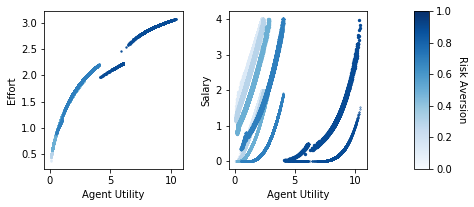

<Figure size 432x288 with 0 Axes>

In [12]:
#markers' list, not found in code, redefined 29.9.2020
marks =["o","h","v","<",">"]
marks =[".",".",".","."]

fig= plt.figure(figsize=(8, 3), constrained_layout=False)#
gs = fig.add_gridspec(1, 8, hspace = 6, wspace=3)
# Getting specific colors in colorbar
cmap_blue = mpl.cm.Blues #using Blues

ax1 = fig.add_subplot(gs[:, 0:3])
#ax1 = fig.add_subplot()
ax1.scatter(V_ga10, effort_10, lw=1.4, s=0.9, c='#DCEAF7')
ax1.scatter(V_ga30, effort_30, lw=1.4, s=0.9, c='#B8D4EA')
ax1.scatter(V_ga50, effort_50, lw=1.4, s=0.9, c='#6BAFD4')
ax1.scatter(V_ga70, effort_70, lw=1.4, s=0.9, c='#2E7FBE')
ax1.scatter(V_ga90, effort_90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Agent Utility",fontsize=10)
plt.ylabel("Effort",fontsize=10)

ax2 = fig.add_subplot(gs[:, 3:6])
#ax1 = fig.add_subplot()
ax2.scatter(V_ga10, WL_ga10, lw=1.4, s=0.9, c='#DCEAF7', marker=marks[1])
ax2.scatter(V_ga10, WH_ga10, lw=1.4, s=15.0, c='#DCEAF7', marker=marks[3])
ax2.scatter(V_ga30, WL_ga30, lw=1.4, s=0.9, c='#B8D4EA', marker=marks[1])
ax2.scatter(V_ga30, WH_ga30, lw=1.4, s=15.0, c='#B8D4EA', marker=marks[3])
ax2.scatter(V_ga50, WL_ga50, lw=1.4, s=0.9, c='#6BAFD4', marker=marks[1])
ax2.scatter(V_ga50, WH_ga50, lw=1.4, s=15.0, c='#6BAFD4', marker=marks[3])
ax2.scatter(V_ga70, WL_ga70, lw=1.4, s=0.9, c='#2E7FBE', marker=marks[1])
ax2.scatter(V_ga70, WH_ga70, lw=1.4, s=15.0, c='#2E7FBE', marker=marks[3])
ax2.scatter(V_ga90, WL_ga90, lw=1.4, s=0.9, c='#074B96', marker=marks[1])
ax2.scatter(V_ga90, WH_ga90, lw=1.4, s=15.0, c='#074B96', marker=marks[3])
plt.xlabel("Agent Utility",fontsize=10)
plt.ylabel("Salary",fontsize=10)

ax3 = fig.add_subplot(gs[:,6:7])
#seting color bar
#reds = cm.get_cmap('Reds', 256)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cbar = mpl.colorbar.ColorbarBase(ax3, 
                                 cmap=cmap_blue,
                                 norm = norm)
#cbar.set_ticks([0,255])
cbar.set_label('Risk Aversion', 
               rotation = 270, 
               labelpad=15.0)

#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.9, top=0.9,wspace = 0.32)
plt.show()

plt.savefig('./reports/Imp_Inf_GA_risk_aversion_effort_1x2.pdf')

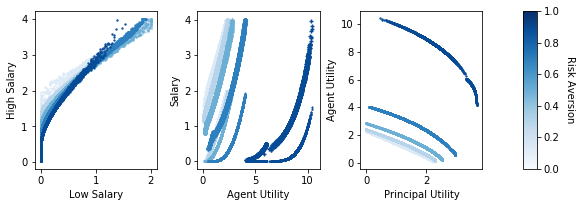

<Figure size 432x288 with 0 Axes>

In [13]:
fig= plt.figure(figsize=(9, 3), constrained_layout=False)#
gs = fig.add_gridspec(1, 10, hspace = 6, wspace=3)
# Getting specific colors in colorbar
cmap_blue = mpl.cm.Blues #using Blues
marks = [">", '^', (5,0), '+', (5,2)]#, (5,1)]

ax1 = fig.add_subplot(gs[:, 0:3])
#ax1 = fig.add_subplot()
ax1.scatter(WL_ga10, WH_ga10, lw=1.4, s=0.9, c='#DCEAF7')
ax1.scatter(WL_ga30, WH_ga30, lw=1.4, s=0.9, c='#B8D4EA')
ax1.scatter(WL_ga50, WH_ga50, lw=1.4, s=0.9, c='#6BAFD4')
ax1.scatter(WL_ga70, WH_ga70, lw=1.4, s=0.9, c='#2E7FBE')
ax1.scatter(WL_ga90, WH_ga90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Low Salary",fontsize=10)
plt.ylabel("High Salary",fontsize=10)

ax2 = fig.add_subplot(gs[:, 3:6])
#ax1 = fig.add_subplot()
ax2.scatter(V_ga10, WL_ga10, lw=1.4, s=0.9, c='#DCEAF7', marker=marks[1])
ax2.scatter(V_ga10, WH_ga10, lw=1.4, s=15.0, c='#DCEAF7', marker=marks[3])
ax2.scatter(V_ga30, WL_ga30, lw=1.4, s=0.9, c='#B8D4EA', marker=marks[1])
ax2.scatter(V_ga30, WH_ga30, lw=1.4, s=15.0, c='#B8D4EA', marker=marks[3])
ax2.scatter(V_ga50, WL_ga50, lw=1.4, s=0.9, c='#6BAFD4', marker=marks[1])
ax2.scatter(V_ga50, WH_ga50, lw=1.4, s=15.0, c='#6BAFD4', marker=marks[3])
ax2.scatter(V_ga70, WL_ga70, lw=1.4, s=0.9, c='#2E7FBE', marker=marks[1])
ax2.scatter(V_ga70, WH_ga70, lw=1.4, s=15.0, c='#2E7FBE', marker=marks[3])
ax2.scatter(V_ga90, WL_ga90, lw=1.4, s=0.9, c='#074B96', marker=marks[1])
ax2.scatter(V_ga90, WH_ga90, lw=1.4, s=15.0, c='#074B96', marker=marks[3])
plt.xlabel("Agent Utility",fontsize=10)
plt.ylabel("Salary",fontsize=10)

ax3 = fig.add_subplot(gs[:, 6:9])
ax3.scatter(U_ga10, V_ga10, lw=1.4, s=0.9, c='#DCEAF7')
ax3.scatter(U_ga30, V_ga30, lw=1.4, s=0.9, c='#B8D4EA')
ax3.scatter(U_ga50, V_ga50, lw=1.4, s=0.9, c='#6BAFD4')
ax3.scatter(U_ga70, V_ga70, lw=1.4, s=0.9, c='#2E7FBE')
ax3.scatter(U_ga90, V_ga90, lw=1.4, s=0.9, c='#074B96')
plt.xlabel("Principal Utility",fontsize=10)
plt.ylabel("Agent Utility",fontsize=10)


ax4 = fig.add_subplot(gs[:,9:10])
#seting color bar
#reds = cm.get_cmap('Reds', 256)

norm = mpl.colors.Normalize(vmin=0, vmax=1)

cbar = mpl.colorbar.ColorbarBase(ax4, 
                                 cmap=cmap_blue,
                                 norm = norm)
#cbar.set_ticks([0,255])
cbar.set_label('Risk Aversion', 
               rotation = 270, 
               labelpad=15.0)

#changing space between plots
plt.subplots_adjust(bottom=0.17, right=0.9, top=0.9,wspace = 0.32)
plt.show()

plt.savefig('./reports/Imp_Inf_GA_risk_aversion_1x3.pdf')

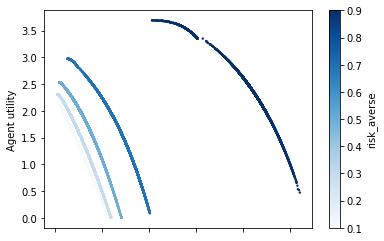

<Figure size 432x288 with 0 Axes>

In [15]:
db_sims.plot.scatter(x = 'agent', y = 'princ',
                     c = 'risk_averse',
                     #colormap='Binary',
                     #colormap = 'Wistia',
                     colormap ='Blues',
                     #colormap = 'Greys',
                     #colormap='viridis',
                     lw = 1.4, s = 1.0, alpha = 1)
plt.ylabel("Agent utility", fontsize=10)
plt.xlabel("Principal utility", fontsize=10)
#Adding color barcbar = plt.colorbar()

plt.show()

plt.savefig('./reports/Pareto_Front_asymmetric.pdf')


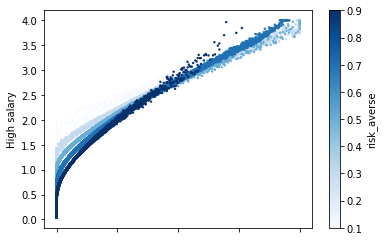

In [17]:
db_sims.plot.scatter(x='wl',y='wh',
                     c='risk_averse',
                     #colormap='viridis',
                     #colormap='Binary',
                     colormap ='Blues',
                     #colormap='Greys',
                     lw=1.4,s=1.0,alpha=1)
plt.xlabel("Low salary")
plt.ylabel("High salary")


plt.savefig('./reports/Salary_asymmetric.pdf')


# Ploting with comparation

In [19]:
#Data from Genetic Algorithm Simulation Perfect# 

#Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook
# If there's no database with that name, it will create a new dataframe. 
# After the first simulation will be store. 
name = "simulations_Enero_Prueba_80k"

try:
    db_sims = pd.read_csv('./data/{}.csv'.format(name)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name))
    print("Creating new database named {}.cvc".format(name))
    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
db_sims.rename(columns= {'Unnamed: 0':'sim','cara':'risk_aversion_coefficient'},inplace=True)
#db_sims.set_index('sim',inplace= True)
#printing head of dataframe,checkingif everything is ok
db_sims.head()

,vU,vV,WL,WH,RiskAverse,init_pop,gens,cutoff
sim,,,,,,,,
11e6cd2f-dab1-4133-ad06-afcd0342c428,1.143874,1.960806,0.875074,2.817135,0.5,10,80000,0
11e6cd2f-dab1-4133-ad06-afcd0342c428,1.503191,1.303344,0.083237,2.735731,0.5,10,80000,0
11e6cd2f-dab1-4133-ad06-afcd0342c428,0.904654,2.131348,0.996615,3.256526,0.5,10,80000,0
11e6cd2f-dab1-4133-ad06-afcd0342c428,2.050364,0.972343,0.104834,1.799764,0.5,10,80000,0
11e6cd2f-dab1-4133-ad06-afcd0342c428,1.191454,1.915589,0.821870,2.783089,0.5,10,80000,0


In [20]:
#Data from Genetic Algorithm Simulation
U_ga11 = db_sims[(db_sims['RiskAverse']==0.5) & (db_sims['cutoff']==11)]['vU']
V_ga11 = db_sims[(db_sims['RiskAverse']==0.5) & (db_sims['cutoff']==11)]['vV']
WL_ga11 = db_sims[(db_sims['RiskAverse']==0.5) & (db_sims['cutoff']==11)]['WL']
WH_ga11 = db_sims[(db_sims['RiskAverse']==0.5) & (db_sims['cutoff']==11)]['WH']

In [21]:
#Data from Genetic Algorithm Simulation ImPerfect# 

#Creating a database and loading from disc, 
# run this cell each time you reopen the jupyter notebook
# If there's no database with that name, it will create a new dataframe. 
# After the first simulation will be store.
name = "simulations_50K"

try:
    db_sims = pd.read_csv('./data/{}.csv'.format(name)).set_index('sim')
except:
    print("Impossible to retrieve {}.cvc".format(name))
    print("Creating new database named {}.cvc".format(name))
    
#Cleaning dataframe, changing index,changing columns name in case they are wrong
db_sims.rename(columns= {'Unnamed: 0':'sim','cara':'risk_aversion_coefficient'},inplace=True)
#db_sims.set_index('sim',inplace= True)
#printing head of dataframe,checkingif everything is ok
db_sims.head()

,u_p,u_a,w_l,w_h,risk_aversion_coefficient,beta,init_pop,gens
sim,,,,,,,,
b614071e-9d54-4027-a275-ecfe8f8b9799,1.983400,0.377506,0.085311,1.939916,0.1,0.96,20,50000
b614071e-9d54-4027-a275-ecfe8f8b9799,1.958057,0.406117,0.134011,1.930540,0.1,0.96,20,50000
b614071e-9d54-4027-a275-ecfe8f8b9799,1.911869,0.448248,0.094959,2.081410,0.1,0.96,20,50000
b614071e-9d54-4027-a275-ecfe8f8b9799,1.105138,1.258426,0.950601,2.821997,0.1,0.96,20,50000
b614071e-9d54-4027-a275-ecfe8f8b9799,1.495374,0.879400,0.564469,2.430465,0.1,0.96,20,50000


In [22]:
U_ga50 = db_sims[(db_sims['risk_aversion_coefficient']==0.5)]['u_p']
V_ga50 = db_sims[(db_sims['risk_aversion_coefficient']==0.5)]['u_a']
WL_ga50 = db_sims[(db_sims['risk_aversion_coefficient']==0.5)]['w_l']
WH_ga50 = db_sims[(db_sims['risk_aversion_coefficient']==0.5)]['w_h']

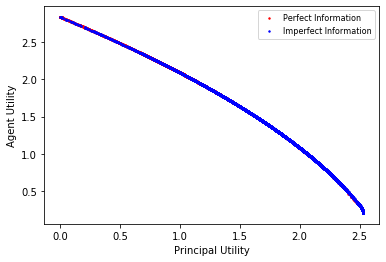

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(6, 4))

plt.scatter(U_ga11, V_ga11, s=2.0, c='red', label='Perfect Information')
plt.scatter(U_ga50, V_ga50, s=2.0, c='blue', label='Imperfect Information')
plt.xlabel("Principal Utility",fontsize=10)
plt.ylabel("Agent Utility",fontsize=10)
plt.legend(fontsize=8) 

plt.show()
plt.savefig('./reports/Third_Comparation.pdf')